<a href="https://colab.research.google.com/github/UdayG01/Topic-Modelling-NLP/blob/main/TopicModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Topic Modelling

<h5>Aims:</h5>

* Implementing topic modelling using algos of LDA, LSA and NMF
* I took the csv file from Kaggle containing data of news headlines published over a period of 19 years. (https://www.kaggle.com/datasets/therohk/million-headlines)

<h5>Results:</h5>

* Performed preprocessing firstly by tokenization and omitting stopwords. Processes of lemmatizing and stemming of words were also carried out. Apparently, words regardless of their tense (past, present or future), or attached to some prefixes or suffixes (creating, created -> create) would not change the semantics of a sentence and hence should belong under one topic.
* Firsly, I read and implemented LDA (Latent Dirichlet Allocation) and use pyLDAvis to plot the results obtained.
* I made an attempt to understand two more techniques for the same purpose: LSA and NMF. Observed the results and differences of each.


#### 1. LDA

In [ ]:
import pandas as pd

data = pd.read_csv('/content/abcnews-date-text.csv', on_bad_lines = "skip"); #use on_bad_lines="skip" instead of error_bad_lines = False
data_text = data[['headline_text']]
data_text['index'] = data_text.index
documents = data_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(len(documents))
print(documents[:5])

85041
                                       headline_text  index
0  aba decides against community broadcasting lic...      0
1     act fire witnesses must be aware of defamation      1
2     a g calls for infrastructure protection summit      2
3           air nz staff in aust strike for pay rise      3
4      air nz strike to affect australian travellers      4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred

True

In [ ]:
stemmer = PorterStemmer()
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

documents = documents.dropna(subset=['headline_text'])

processed_docs = documents['headline_text'].map(preprocess)
print(processed_docs[:10])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


original document: 
['ratepayers', 'group', 'wants', 'compulsory', 'local', 'govt', 'voting']


 tokenized and lemmatized document: 
['ratepay', 'group', 'want', 'compulsori', 'local', 'govt', 'vote']
0               [decid, commun, broadcast, licenc]
1                               [wit, awar, defam]
2           [call, infrastructur, protect, summit]
3                      [staff, aust, strike, rise]
4             [strike, affect, australian, travel]
5               [ambiti, olsson, win, tripl, jump]
6           [antic, delight, record, break, barca]
7    [aussi, qualifi, stosur, wast, memphi, match]
8            [aust, address, secur, council, iraq]
9                         [australia, lock, timet]
Name: headline_text, dtype: object


In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0 broadcast
1 commun
2 decid
3 licenc
4 awar
5 defam
6 wit
7 call
8 infrastructur
9 protect
10 summit


In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(143, 1), (214, 1), (256, 1), (518, 1), (726, 1), (2468, 1), (2469, 1)]

In [ ]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0],
                                               dictionary[bow_doc_4310[i][0]],
bow_doc_4310[i][1]))

Word 143 ("govt") appears 1 time.
Word 214 ("group") appears 1 time.
Word 256 ("vote") appears 1 time.
Word 518 ("local") appears 1 time.
Word 726 ("want") appears 1 time.
Word 2468 ("compulsori") appears 1 time.
Word 2469 ("ratepay") appears 1 time.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 0.5743133953909403),
 (1, 0.4014323013822043),
 (2, 0.48683184591009715),
 (3, 0.5215467237834822)]


In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.047*"kill" + 0.028*"iraq" + 0.023*"attack" + 0.019*"bomb" + 0.014*"claim" + 0.014*"arrest" + 0.012*"blast" + 0.012*"troop" + 0.012*"iraqi" + 0.011*"launch"
Topic: 1 
Words: 0.035*"council" + 0.027*"plan" + 0.021*"govt" + 0.020*"fund" + 0.018*"boost" + 0.016*"health" + 0.015*"elect" + 0.013*"group" + 0.011*"support" + 0.011*"centr"
Topic: 2 
Words: 0.029*"hospit" + 0.025*"crash" + 0.022*"polic" + 0.019*"test" + 0.018*"home" + 0.015*"die" + 0.015*"pakistan" + 0.015*"rail" + 0.015*"woman" + 0.011*"accid"
Topic: 3 
Words: 0.035*"polic" + 0.026*"warn" + 0.022*"govt" + 0.016*"secur" + 0.015*"urg" + 0.015*"continu" + 0.013*"probe" + 0.012*"latham" + 0.012*"public" + 0.012*"road"
Topic: 4 
Words: 0.032*"seek" + 0.020*"open" + 0.015*"water" + 0.015*"drought" + 0.012*"rain" + 0.011*"fall" + 0.011*"bird" + 0.011*"north" + 0.011*"sale" + 0.011*"west"
Topic: 5 
Words: 0.024*"protest" + 0.021*"sydney" + 0.020*"south" + 0.014*"market" + 0.013*"year" + 0.012*"record" + 0.010*"break"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 Word: 0.018*"polic" + 0.011*"miss" + 0.009*"probe" + 0.008*"search" + 0.007*"concern" + 0.007*"charg" + 0.007*"rail" + 0.006*"safeti" + 0.006*"death" + 0.005*"road"
Topic: 1 Word: 0.022*"kill" + 0.012*"blast" + 0.010*"bomb" + 0.010*"polic" + 0.009*"accid" + 0.008*"arrest" + 0.008*"attack" + 0.008*"suspect" + 0.007*"soldier" + 0.006*"palestinian"
Topic: 2 Word: 0.009*"murder" + 0.008*"shoot" + 0.007*"sydney" + 0.006*"polic" + 0.006*"visit" + 0.006*"charg" + 0.005*"tiger" + 0.005*"lead" + 0.005*"appeal" + 0.005*"bulldog"
Topic: 3 Word: 0.010*"final" + 0.008*"world" + 0.006*"home" + 0.006*"england" + 0.006*"wallabi" + 0.005*"dump" + 0.005*"christma" + 0.004*"futur" + 0.004*"open" + 0.004*"feder"
Topic: 4 Word: 0.009*"crash" + 0.007*"die" + 0.006*"highway" + 0.006*"beatti" + 0.006*"japanes" + 0.005*"record" + 0.005*"upgrad" + 0.004*"lion" + 0.004*"premier" + 0.004*"break"
Topic: 5 Word: 0.007*"sign" + 0.007*"trade" + 0.006*"announc" + 0.006*"deal" + 0.005*"export" + 0.005*"resign"

In [ ]:
processed_docs[4310]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['ratepay', 'group', 'want', 'compulsori', 'local', 'govt', 'vote']

In [ ]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.3955235183238983	 
Topic: 0.035*"council" + 0.027*"plan" + 0.021*"govt" + 0.020*"fund" + 0.018*"boost" + 0.016*"health" + 0.015*"elect" + 0.013*"group" + 0.011*"support" + 0.011*"centr"

Score: 0.1939995288848877	 
Topic: 0.019*"releas" + 0.019*"strike" + 0.018*"appeal" + 0.016*"lose" + 0.014*"easter" + 0.014*"rescu" + 0.012*"call" + 0.012*"action" + 0.010*"tiger" + 0.010*"fish"

Score: 0.17373298108577728	 
Topic: 0.024*"lead" + 0.018*"final" + 0.016*"australia" + 0.015*"aussi" + 0.014*"win" + 0.013*"green" + 0.012*"get" + 0.011*"port" + 0.010*"award" + 0.009*"tour"

Score: 0.1616896092891693	 
Topic: 0.032*"seek" + 0.020*"open" + 0.015*"water" + 0.015*"drought" + 0.012*"rain" + 0.011*"fall" + 0.011*"bird" + 0.011*"north" + 0.011*"sale" + 0.011*"west"

Score: 0.012510864064097404	 
Topic: 0.035*"polic" + 0.026*"warn" + 0.022*"govt" + 0.016*"secur" + 0.015*"urg" + 0.015*"continu" + 0.013*"probe" + 0.012*"latham" + 0.012*"public" + 0.012*"road"

Score: 0.012510398402810097	 
T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.3111034333705902	 Topic: 0.019*"releas" + 0.019*"strike" + 0.018*"appeal" + 0.016*"lose" + 0.014*"easter"
Score: 0.2874593436717987	 Topic: 0.032*"seek" + 0.020*"open" + 0.015*"water" + 0.015*"drought" + 0.012*"rain"
Score: 0.2613677382469177	 Topic: 0.047*"kill" + 0.028*"iraq" + 0.023*"attack" + 0.019*"bomb" + 0.014*"claim"
Score: 0.020012278109788895	 Topic: 0.029*"hospit" + 0.025*"crash" + 0.022*"polic" + 0.019*"test" + 0.018*"home"
Score: 0.020011955872178078	 Topic: 0.024*"protest" + 0.021*"sydney" + 0.020*"south" + 0.014*"market" + 0.013*"year"
Score: 0.020011210814118385	 Topic: 0.035*"council" + 0.027*"plan" + 0.021*"govt" + 0.020*"fund" + 0.018*"boost"
Score: 0.020009588450193405	 Topic: 0.035*"polic" + 0.026*"warn" + 0.022*"govt" + 0.016*"secur" + 0.015*"urg"
Score: 0.020009377971291542	 Topic: 0.026*"miss" + 0.019*"chief" + 0.018*"say" + 0.015*"iraq" + 0.014*"meet"
Score: 0.020008156076073647	 Topic: 0.044*"charg" + 0.035*"court" + 0.031*"face" + 0.021*"murder" + 0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis
#import pyLDAvis.sklearn

#vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
import pyLDAvis.gensim_models as gensimvis
vis = gensimvis.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### 2. LSA

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Download stopwords and wordnet from NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the CSV file containing text data
csv_file_path = '/content/abcnews-date-text.csv'
df = pd.read_csv(csv_file_path)

# Preprocessing: Tokenization, lowercasing, stopwords removal, and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(filtered_tokens)

df['processed_text'] = df['headline_text'].apply(preprocess_text)

# Create TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

# Apply Latent Semantic Analysis (LSA)
num_topics = 10  # Set the number of topics as per your requirement
lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
lsa_matrix = lsa_model.fit_transform(tfidf_matrix)

# Print the top words in each topic
print("Topics and their top words:")
terms = tfidf_vectorizer.get_feature_names_out()
for i, topic in enumerate(lsa_model.components_):
    top_words = [terms[idx] for idx in topic.argsort()[-10:][::-1]]
    print(f"Topic {i + 1}: {', '.join(top_words)}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topics and their top words:
Topic 1: police, man, charged, new, court, crash, murder, death, woman, car
Topic 2: man, charged, police, murder, court, missing, charge, stabbing, jailed, crash
Topic 3: police, probe, investigate, officer, search, hunt, arrest, missing, seek, witness
Topic 4: news, abc, rural, national, market, business, weather, sport, analysis, entertainment
Topic 5: new, abc, news, zealand, man, case, interview, weather, australia, sport
Topic 6: interview, extended, michael, court, rural, national, back, nrl, win, john
Topic 7: crash, car, killed, fire, dy, fatal, two, road, woman, hit
Topic 8: australia, day, world, court, win, country, cup, hour, face, australian
Topic 9: fire, rural, nsw, national, country, call, hour, news, qld, woman
Topic 10: fire, abc, court, house, weather, face, home, market, sport, health


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topics and their top words:
Topic 1: police, man, charged, new, court, crash, murder, death, woman, car


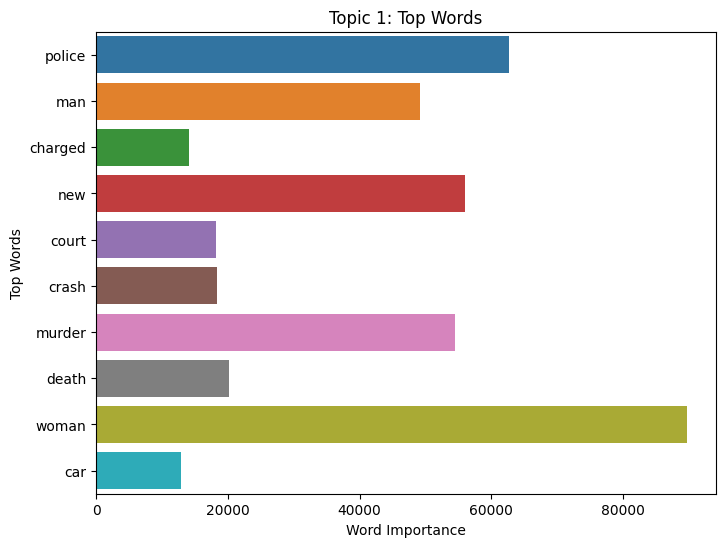

Topic 2: man, charged, police, murder, court, missing, charge, stabbing, jailed, crash


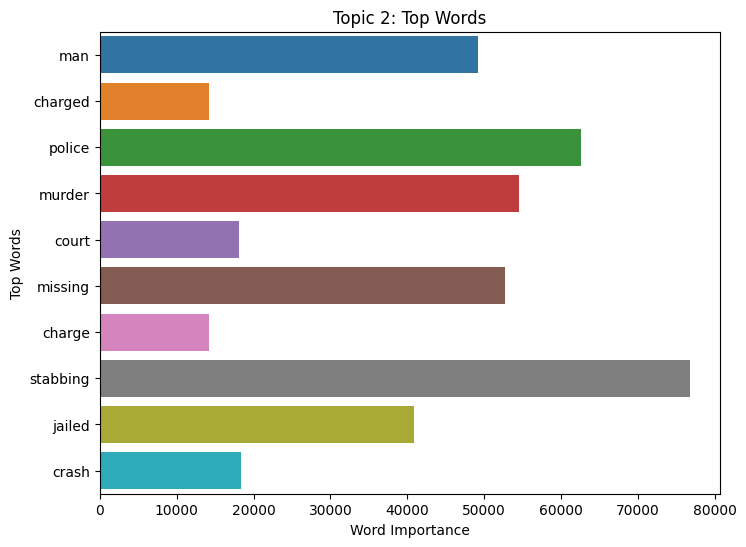

Topic 3: police, probe, investigate, officer, search, hunt, arrest, missing, seek, witness


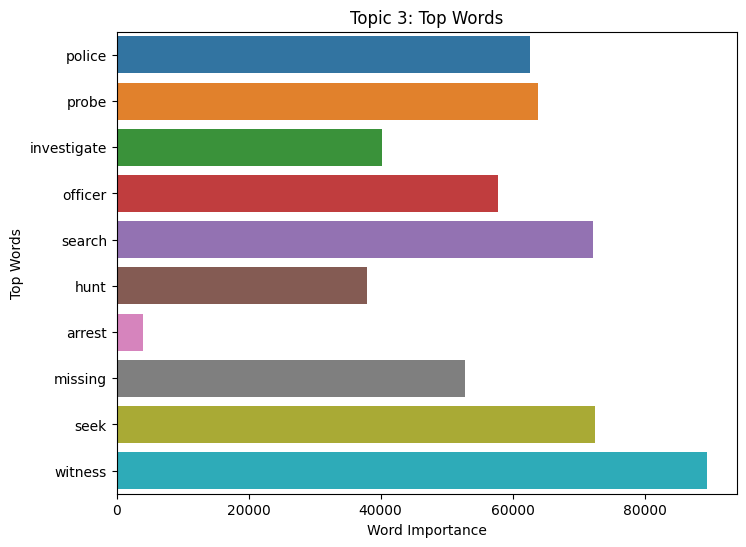

Topic 4: news, abc, rural, national, market, business, weather, sport, analysis, entertainment


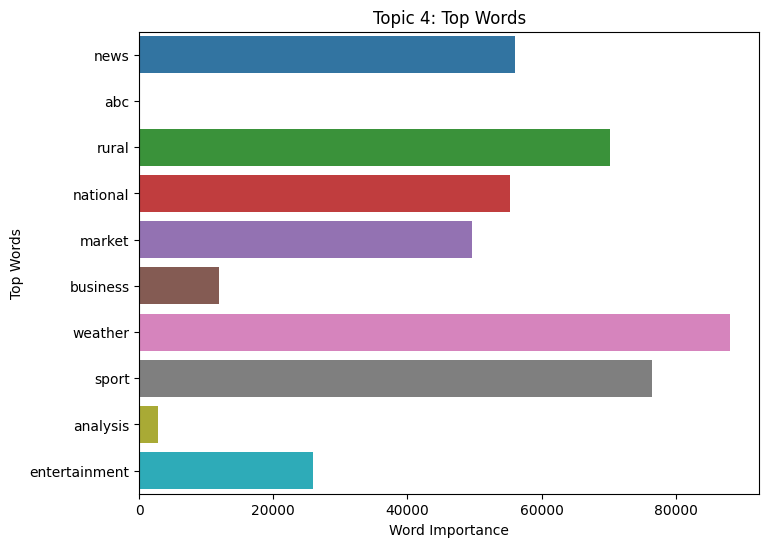

Topic 5: new, abc, news, zealand, man, case, interview, weather, australia, sport


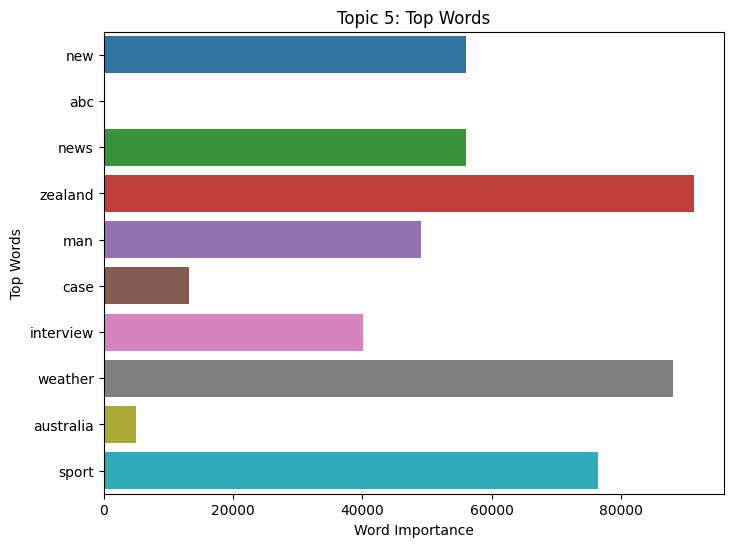

Topic 6: interview, extended, michael, court, rural, national, back, nrl, win, john


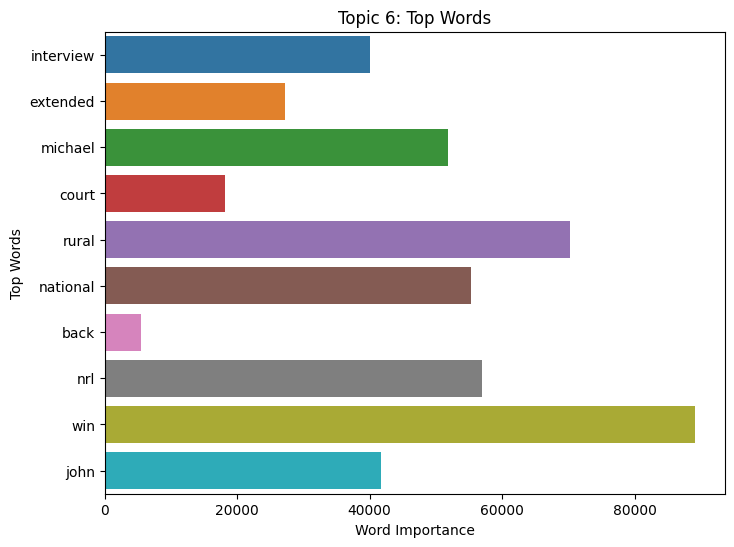

Topic 7: crash, car, killed, fire, dy, fatal, two, road, woman, hit


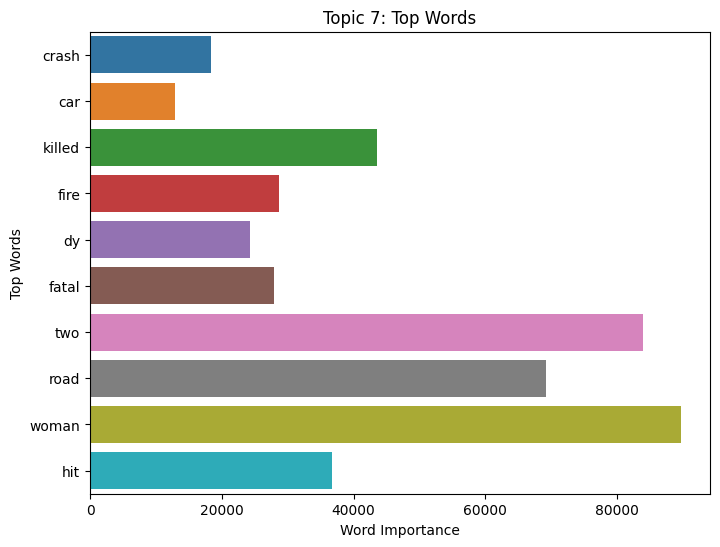

Topic 8: australia, day, world, court, win, country, cup, hour, face, australian


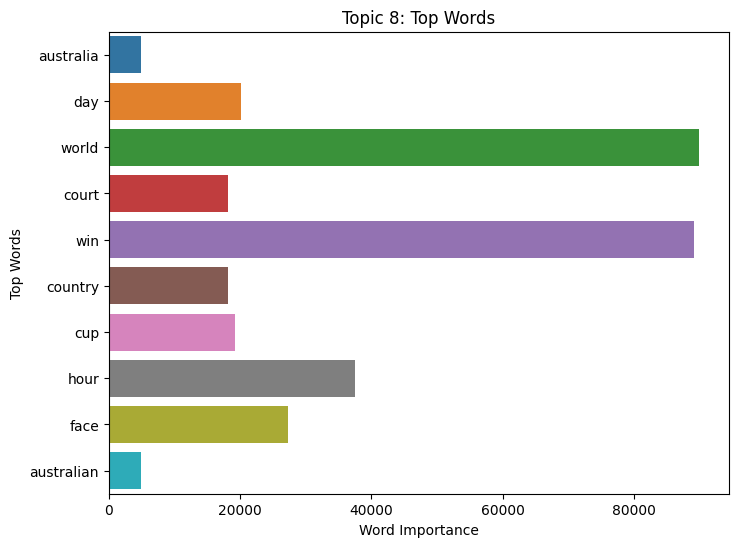

Topic 9: fire, rural, nsw, national, country, call, hour, news, qld, woman


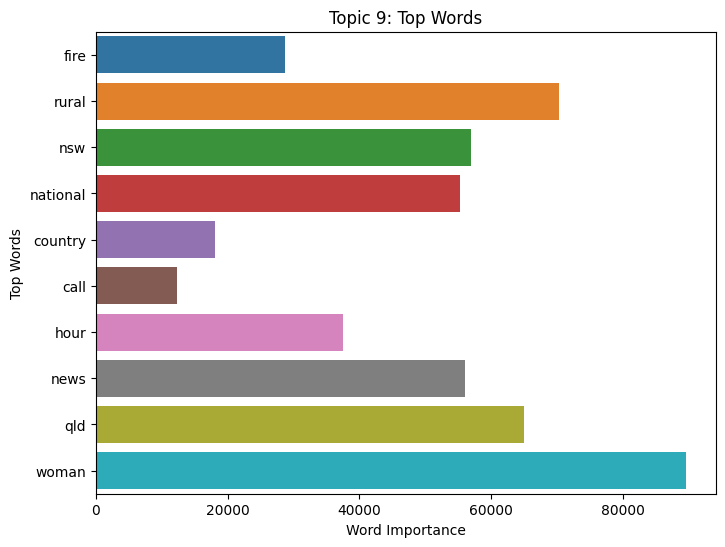

Topic 10: fire, abc, court, house, weather, face, home, market, sport, health


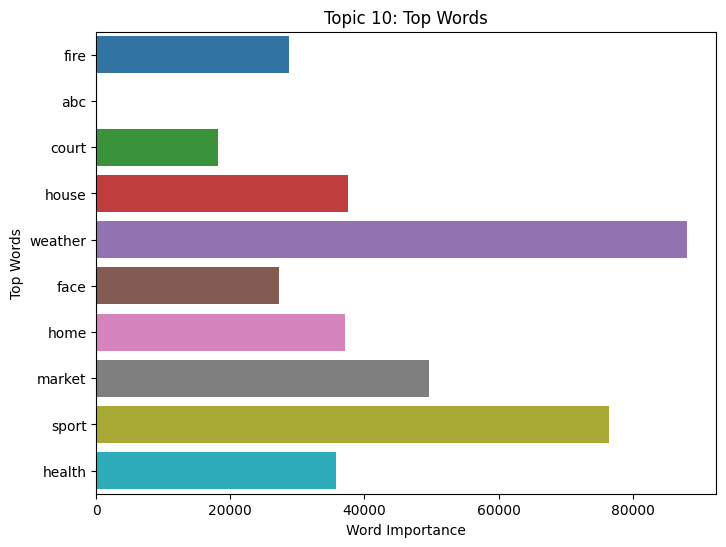

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print and plot the top words in each topic
print("Topics and their top words:")
terms = tfidf_vectorizer.get_feature_names_out()
for i, topic in enumerate(lsa_model.components_):
    top_words = [terms[idx] for idx in topic.argsort()[-10:][::-1]]
    print(f"Topic {i + 1}: {', '.join(top_words)}")

    # Plot the top words as a bar chart
    plt.figure(figsize=(8, 6))
    sns.barplot(x=topic.argsort()[-10:][::-1], y=[terms[idx] for idx in topic.argsort()[-10:][::-1]])
    plt.xlabel('Word Importance')
    plt.ylabel('Top Words')
    plt.title(f'Topic {i + 1}: Top Words')
    plt.show()


In [ ]:
'''
import wordcloud

# Create a word cloud for the top words in each topic
for i, topic in enumerate(lsa_model.components_):
    top_words = [terms[idx] for idx in topic.argsort()[-10:][::-1]]
    wordcloud = wordcloud.WordCloud(width=1000, height=500).generate(' '.join(top_words))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {i + 1}")
    plt.show()
'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\nimport wordcloud\n\n# Create a word cloud for the top words in each topic\nfor i, topic in enumerate(lsa_model.components_):\n    top_words = [terms[idx] for idx in topic.argsort()[-10:][::-1]]\n    wordcloud = wordcloud.WordCloud(width=1000, height=500).generate(\' \'.join(top_words))\n    plt.imshow(wordcloud, interpolation=\'bilinear\')\n    plt.axis(\'off\')\n    plt.title(f"Topic {i + 1}")\n    plt.show()\n'

* Received some errors while trying to plot the top words for each topic using word cloud, so I chose to stick with matplotlib

#### 3. NMF

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Download stopwords and wordnet from NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the CSV file containing text data
csv_file_path = '/content/abcnews-date-text.csv'
df = pd.read_csv(csv_file_path)

# Preprocessing: Tokenization, lowercasing, stopwords removal, and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(filtered_tokens)

df['processed_text'] = df['headline_text'].apply(preprocess_text)

# Create TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

# Apply Non-Negative Matrix Factorization (NMF)
num_topics = 10  # Set the number of topics as per your requirement
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

# Print the top words in each topic
print("Topics and their top words:")
terms = tfidf_vectorizer.get_feature_names_out()
for i, topic in enumerate(nmf_model.components_):
    top_words = [terms[idx] for idx in topic.argsort()[-10:][::-1]]
    print(f"Topic {i + 1}: {', '.join(top_words)}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topics and their top words:
Topic 1: man, charged, court, murder, face, charge, accused, death, jailed, child
Topic 2: council, plan, say, govt, call, back, water, health, change, cut
Topic 3: police, investigate, probe, missing, search, death, officer, hunt, arrest, shooting
Topic 4: news, abc, rural, national, market, business, weather, sport, analysis, entertainment
Topic 5: new, zealand, year, case, law, record, open, coronavirus, get, home
Topic 6: interview, extended, michael, nrl, john, smith, david, james, ben, andrew
Topic 7: crash, car, killed, woman, fatal, dy, road, driver, two, plane
Topic 8: australia, day, win, world, south, cup, australian, test, first, one
Topic 9: country, hour, nsw, wa, ta, vic, qld, august, sa, drum
Topic 10: fire, house, home, crew, blaze, sydney, damage, warning, threat, north
